In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
df["Insulin"].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 186, dtype: int64

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
columns_to_check = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count / len(df)
    print(f"{col}: {zero_count} %{zero_percentage:.2f}")

Glucose: 5 %0.65
BloodPressure: 35 %4.56
SkinThickness: 227 %29.56
Insulin: 374 %48.70
BMI: 11 %1.43


In [11]:
import warnings
warnings.filterwarnings('ignore')

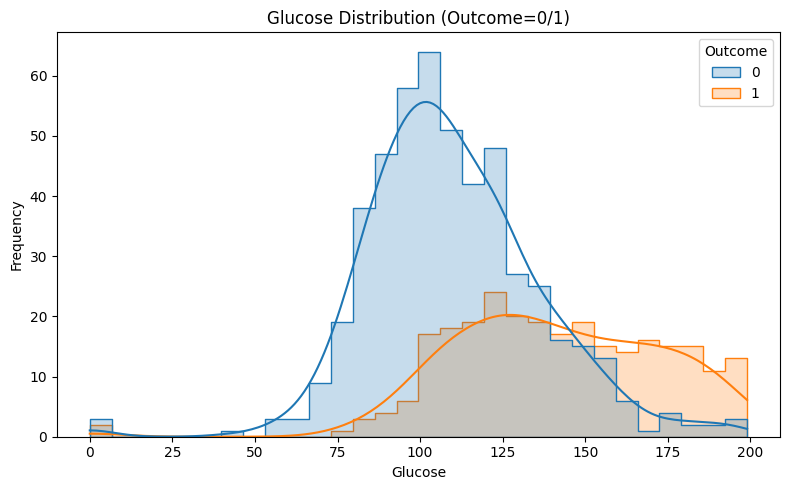

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Glucose", hue="Outcome", kde=True, bins=30, element="step")
plt.title("Glucose Distribution (Outcome=0/1)")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

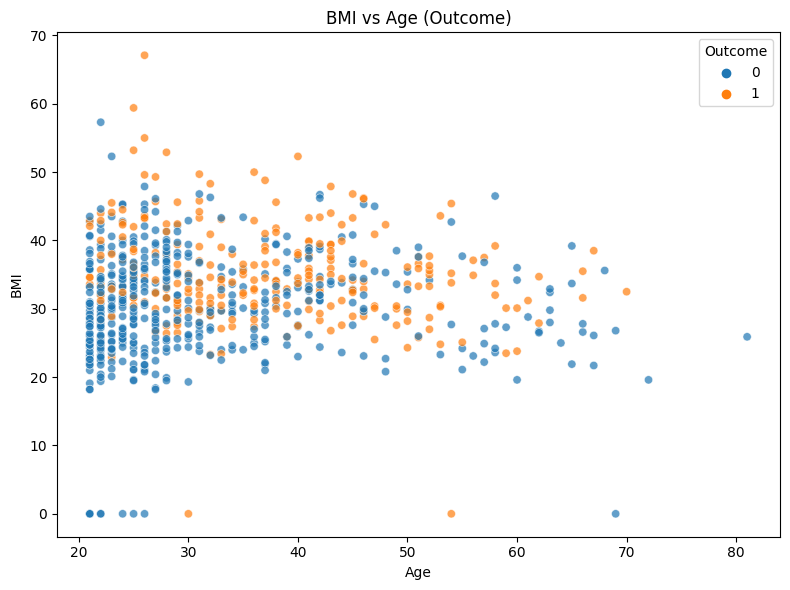

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Age", y="BMI", hue="Outcome", alpha=0.7)
plt.title("BMI vs Age (Outcome)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()


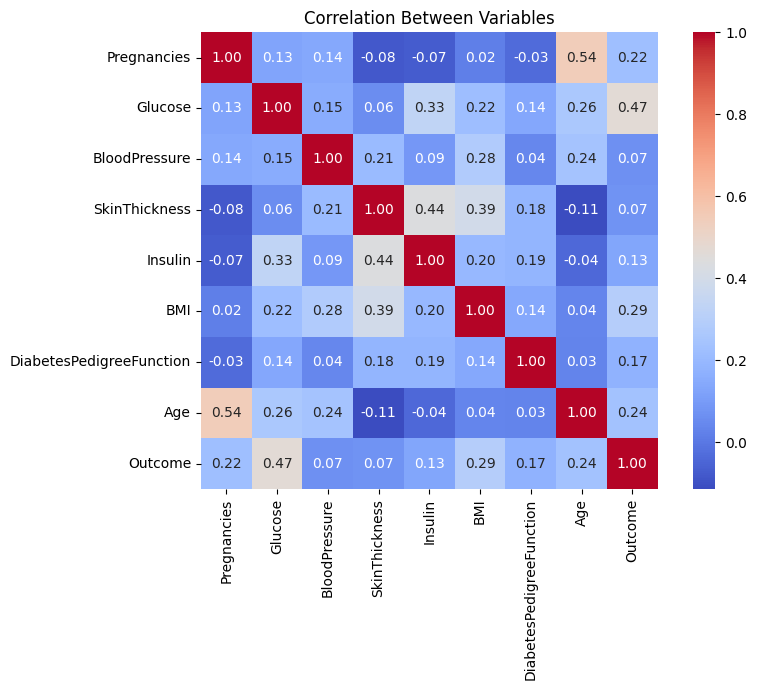

In [16]:
plt.figure(figsize=(9,7))
num_cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
corr = df[num_cols].corr()   
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Between Variables")
plt.tight_layout()
plt.show()

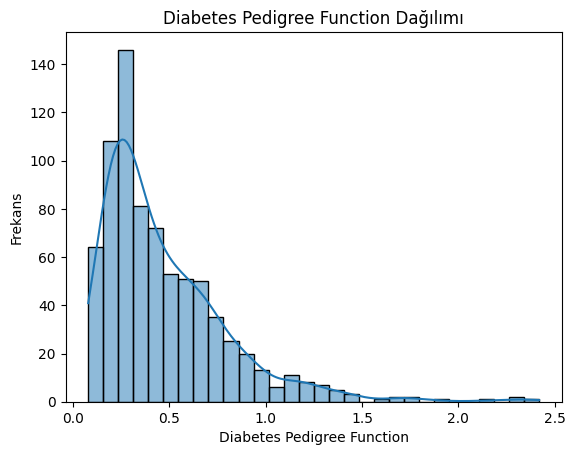

In [17]:
sns.histplot(df['DiabetesPedigreeFunction'],bins=30,kde=True)
plt.title('Diabetes Pedigree Function Dağılımı')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel("Frekans")
plt.show()

In [18]:
x = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15)

In [20]:
columns_to_fill = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [21]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.907166,120.607492,69.446254,20.114007,79.625407,31.922150,0.469948,33.285016
std,3.385438,31.904793,19.240036,15.789295,111.225898,7.999904,0.328516,11.678337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,1.000000,99.250000,64.000000,0.000000,0.000000,27.400000,0.238250,24.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.370500,29.000000
75%,6.000000,139.750000,80.000000,32.000000,130.000000,36.500000,0.630750,40.000000
max,17.000000,199.000000,122.000000,63.000000,680.000000,67.100000,2.420000,81.000000


In [22]:
x_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.597403,122.038961,67.746753,22.220779,80.493506,32.273377,0.479565,33.064935
std,3.304818,32.320876,19.816004,16.531312,130.434831,7.423008,0.343303,12.118519
min,0.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,95.250000,62.000000,7.250000,0.000000,26.800000,0.254000,24.000000
50%,3.000000,117.000000,70.000000,23.500000,26.000000,32.200000,0.376500,28.000000
75%,5.750000,142.750000,80.000000,33.750000,112.750000,36.950000,0.603750,41.000000
max,13.000000,197.000000,106.000000,99.000000,846.000000,55.000000,2.329000,69.000000


In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [24]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.59      0.65      0.62        46

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154

0.7597402597402597
[[87 21]
 [16 30]]


In [26]:
##Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [28]:
adaboost_param = {
    "n_estimators": [50,70,100,120,150,200],
    "learning_rate" : [0.001,0.01,0.1,1,10],
    "algorithm": ["SAMME", "SAMME.R"]        
}

In [29]:
grid = GridSearchCV(estimator=AdaBoostClassifier(),param_grid = adaboost_param,cv=3,verbose=1,n_jobs=-1)

In [30]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 100, 120, 150, 200]},
             verbose=1)

In [31]:
grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 150}

In [32]:
ada = AdaBoostClassifier(learning_rate=1,n_estimators=150 , algorithm ='SAMME')

In [33]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       108
           1       0.60      0.63      0.62        46

    accuracy                           0.77       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.77      0.77       154

0.7662337662337663
[[89 19]
 [17 29]]


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [40]:
models = {
    "KNN" : KNeighborsClassifier(),
    "dtc" : DecisionTreeClassifier(),
    "rfc" : RandomForestClassifier(),
    "lr" : LogisticRegression(),
    "svc" : SVC()
} 

In [42]:
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    score = accuracy_score(y_test, y_pred)

    y_train_pred = model.predict(x_train_scaled)
    train_score = accuracy_score(y_train, y_train_pred)

    print("{}: {}\ntrain_score: {}".format(name, score, train_score))


KNN: 0.7662337662337663
train_score: 0.8241042345276873
dtc: 0.6883116883116883
train_score: 1.0
rfc: 0.7402597402597403
train_score: 1.0
lr: 0.7597402597402597
train_score: 0.7866449511400652
svc: 0.7402597402597403
train_score: 0.8273615635179153


In [43]:
best_model = KNeighborsClassifier()

In [44]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       108
           1       0.57      0.54      0.56        46

    accuracy                           0.74       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.74      0.74      0.74       154

0.7402597402597403
[[89 19]
 [21 25]]
